<a href="https://colab.research.google.com/github/dedeepyay/Fake-Reviews-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    import numpy as np
    import pandas as pd
    import itertools
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    import matplotlib.pyplot as plt
    from collections import Counter
   
    #from sklearn import naive_bayes, metrics, svm
    from IPython.display import Image
    import warnings
    warnings.filterwarnings("ignore")
    %matplotlib inline 


In [ ]:
df = pd.read_csv('/content/news.csv')
X=df['text']
y=df['label']

In [ ]:
print(X)


0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object


In [ ]:
print(y)

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object


In [ ]:
y.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
df.shape

(6335, 4)

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


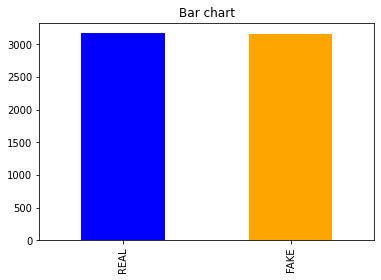

In [ ]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

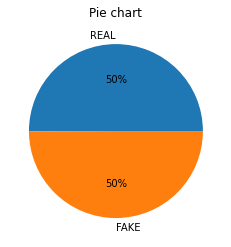

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
count1 = Counter(" ".join(df[df['label']=='REAL']["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in REAL", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='FAKE']["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in FAKE", 1 : "count_"})

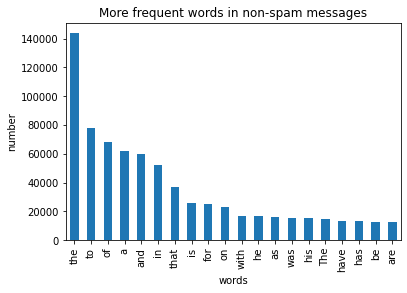

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in REAL"]))
plt.xticks(y_pos, df1["words in REAL"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

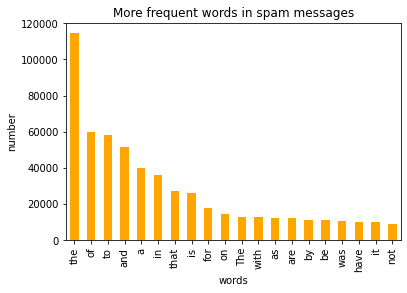

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in FAKE"]))
plt.xticks(y_pos, df2["words in FAKE"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df['text'] 
y = df['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape


(4244, 57109)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1014   57]
 [  72  948]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94      1071
        REAL       0.94      0.93      0.94      1020

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091



In [ ]:
X_train_tfidf1 = vectorizer.fit_transform(["your email was selected to claim to sum of  $ 5,000,000 in the 2011 european lottery"])
X_train_tfidf1.shape

(1, 14)

In [ ]:
predi = text_clf.predict(["your email was selected to claim to sum of  $ 5,000,000 in the 2011 european lottery"])
print(predi)

['FAKE']


In [ ]:
predict=text_clf.predict(["India's Covid-19 caseload has crossed the 8.5 lakh mark. The rapid spread of the pandemic has seen the country's share in daily global cases rise to 12%. Late last night, actor Amitabh Bachchan, son Abhishek tested positive for Covid-19 and were hospitalised. Their residence 'Jalsa' has now been declared a containment zone."])
print(predict)

['FAKE']


In [ ]:
predi = text_clf.predict(["Amid reports that the Congress was faced with a crisis over the survival of its government in Rajasthan, state Tourism Minister Vishvendra Singh on Sunday said he was visiting Delhi over a personal matter."])
print(predi)

['REAL']


In [ ]:
predi = text_clf.predict(["Breaking news live updates: 1 BSF personnel arrested by Punjab police in a drug smuggling case"])
print(predi)

['FAKE']


In [ ]:
predi = text_clf.predict(["your email was selected to claim to sum of  $ 5,000,000 in the 2011 european lottery"])
print(predi)

['FAKE']
